In [124]:
import statsmodels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [125]:
data = pd.read_csv('Truck_sales.csv', usecols=[1])
data_array = data.to_numpy().flatten()
print(data_array)

[155 173 204 219 223 208 228 228 188 165 152 182 160 185 217 229 231 230
 262 262 219 185 167 216 201 220 274 276 318 274 307 307 255 224 213 255
 237 263 297 307 338 336 354 373 289 265 252 299 272 287 363 398 424 374
 407 419 329 293 263 309 283 275 362 385 432 407 465 451 359 318 297 353
 336 341 411 455 499 485 561 535 432 380 347 428 394 405 488 530 587 576
 636 624 492 425 396 471 437 440 548 590 656 650 716 719 560 481 447 517
 471 465 558 590 671 670 756 778 560 497 453 519 499 501 625 671 777 727
 844 861 641 564 529 624 578 572 646 781 872 824 958 933 704 639 571 666]


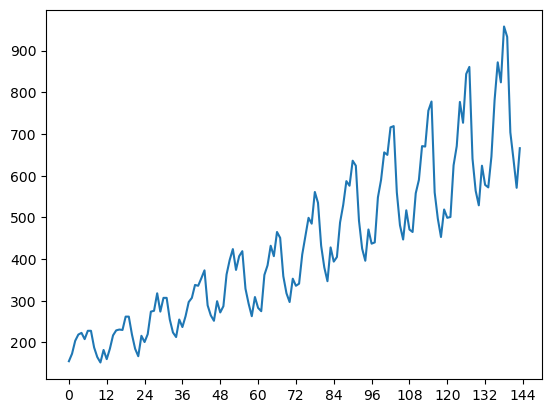

In [126]:
graph_data = data_array.copy()
plt.plot(data_array)
plt.xticks([0, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 132, 144])
plt.show()

### Make data non-seasonal
Remove Seasonality:
$z_t = y_t - y_{t-12}$

In [127]:
nonseasonal_data = data.diff(-12)
nonseasonal_data = nonseasonal_data.dropna()
nonseasonaldata_array = nonseasonal_data.to_numpy().flatten()
print(nonseasonaldata_array)

[  -5.  -12.  -13.  -10.   -8.  -22.  -34.  -34.  -31.  -20.  -15.  -34.
  -41.  -35.  -57.  -47.  -87.  -44.  -45.  -45.  -36.  -39.  -46.  -39.
  -36.  -43.  -23.  -31.  -20.  -62.  -47.  -66.  -34.  -41.  -39.  -44.
  -35.  -24.  -66.  -91.  -86.  -38.  -53.  -46.  -40.  -28.  -11.  -10.
  -11.   12.    1.   13.   -8.  -33.  -58.  -32.  -30.  -25.  -34.  -44.
  -53.  -66.  -49.  -70.  -67.  -78.  -96.  -84.  -73.  -62.  -50.  -75.
  -58.  -64.  -77.  -75.  -88.  -91.  -75.  -89.  -60.  -45.  -49.  -43.
  -43.  -35.  -60.  -60.  -69.  -74.  -80.  -95.  -68.  -56.  -51.  -46.
  -34.  -25.  -10.    0.  -15.  -20.  -40.  -59.    0.  -16.   -6.   -2.
  -28.  -36.  -67.  -81. -106.  -57.  -88.  -83.  -81.  -67.  -76. -105.
  -79.  -71.  -21. -110.  -95.  -97. -114.  -72.  -63.  -75.  -42.  -42.]


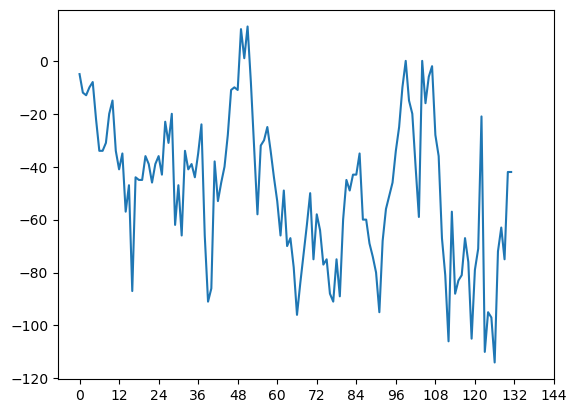

In [128]:
graph_nonseasonaldata = nonseasonaldata_array.copy()
plt.plot(nonseasonaldata_array)
plt.xticks([0, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 132, 144])
plt.show()

### Check for white noise
i) $\mu = 0$

ii) $\sigma^2$ is constant

iii) correlation between lags is 0

In [129]:
# Augmented Dickey-Fuller Test for non-stationarity

# result = adfuller(nonseasonal_data)
# print('ADF Statistic: %f' % result[0])
# print('p-value: %f' % result[1])

In [130]:
# Check mean
mean = np.average(nonseasonal_data)
print("Mean: %f" % mean)

print('Not white noise.')

Mean: -48.628788
Not white noise.


### $\sigma$ and $\mu$ is constant by inspection

### Run ACF and PACF

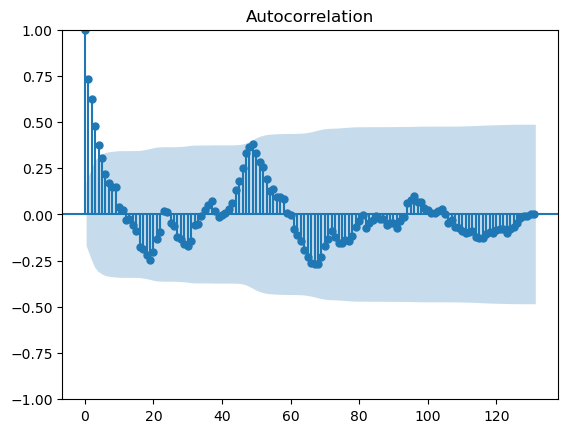

In [131]:
acf_plot = plot_acf(nonseasonal_data, lags=131)

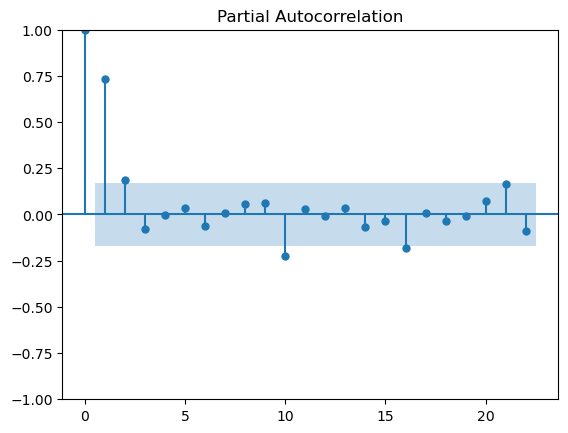

In [132]:
pacf_plot = plot_pacf(nonseasonal_data)

### Fit ARIMA(3,3,0) model to data

In [136]:
model = ARIMA(nonseasonal_data, order=(2,0,0))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:     Number_Trucks_Sold   No. Observations:                  132
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -571.560
Date:                Mon, 20 May 2024   AIC                           1151.120
Time:                        13:39:56   BIC                           1162.651
Sample:                             0   HQIC                          1155.806
                                - 132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -46.9681      7.483     -6.277      0.000     -61.634     -32.303
ar.L1          0.5997      0.083      7.222      0.000       0.437       0.762
ar.L2          0.1946      0.082      2.381      0.0

### Predict future prices from ARIMA(3,3,0)

In [163]:
predictions = results.predict(start=132, end=144, dynamic=False, signal_only=False, information_set='predicted')

In [164]:
predictions = predictions.to_numpy()
print(predictions)

[-43.0220125  -43.63494047 -44.20137199 -44.66032702 -45.04577922
 -45.36623925 -45.63342105 -45.85600565 -46.04147832 -46.19601717
 -46.32478371 -46.43207544 -46.52147391]


In [167]:
# Unnormalize our predictions

unnorm_predictions = predictions
for i in range(len(predictions)-1):
    unnorm_predictions[i] += nonseasonaldata_array[120+i]


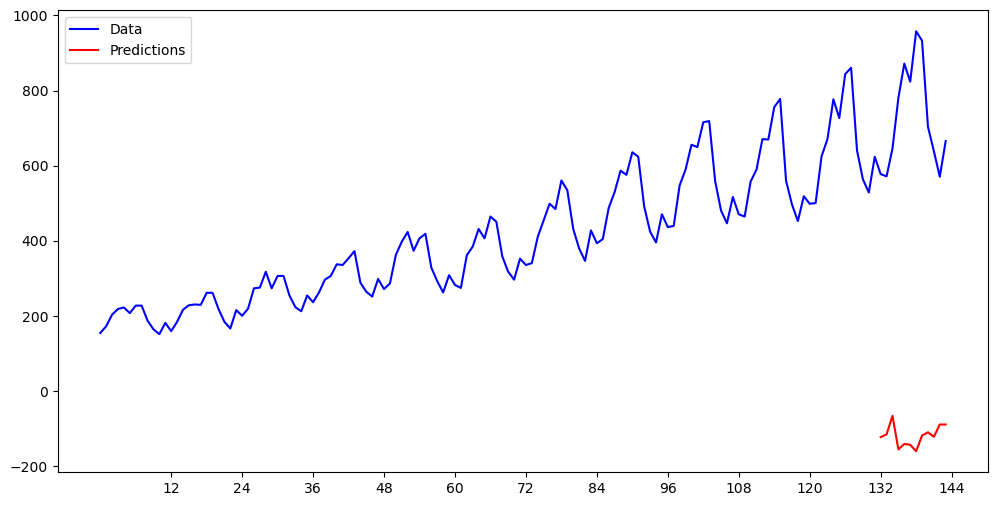

In [168]:
plt.figure(figsize=(12,6))
plt.plot(graph_data, label='Data', color='blue')
plt.plot(range(132, 144), unnorm_predictions[:12], label='Predictions', color='red')
plt.xticks([12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 132, 144])
plt.legend()
plt.show()